<a href="https://colab.research.google.com/github/Haris-09/Machine-Learning/blob/main/Hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, LeaveOneOut, RepeatedKFold, GroupKFold, TimeSeriesSplit, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [21]:
personality = pd.read_csv('https://raw.githubusercontent.com/Haris-09/Machine-Learning/refs/heads/main/Datasets/personality_dataset.csv')
personality.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [22]:
personality.dtypes

,0
Time_spent_Alone,float64
Stage_fear,object
Social_event_attendance,float64
Going_outside,float64
Drained_after_socializing,object
Friends_circle_size,float64
Post_frequency,float64
Personality,object


In [23]:
colum = ['Stage_fear', 'Drained_after_socializing', 'Personality']

le = LabelEncoder()
for col in colum:
    personality[col] = le.fit_transform(personality[col])

personality.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [24]:
X = personality.drop('Personality', axis=1)
y = personality['Personality']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2)

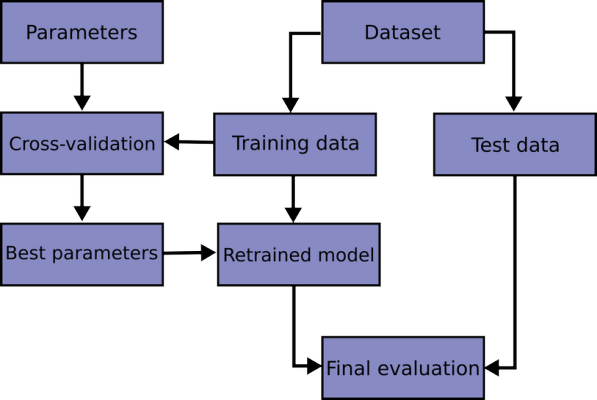

### Threefold Split

In [7]:
val_scores = []
neighbors = np.arange(1, 15)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val))

print(f"best validation accuracy: {max(val_scores):.3f}")
best_n_neighbors = neighbors[np.argmax(val_scores)]
print(f"best n_neighbors: {best_n_neighbors}")

best validation accuracy: 0.929
best n_neighbors: 8


In [8]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"test accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"test score: {knn.score(X_test, y_test):.3f}")

test accuracy: 0.933
test score: 0.933


### Cross-Validation

In [9]:
val_scores = []
neighbors = np.arange(1, 15)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=10)
    val_scores.append(np.mean(score))

print(f"best validation accuracy: {max(val_scores):.3f}")
best_n_neighbors = neighbors[np.argmax(val_scores)]
print(f"best n_neighbors: {best_n_neighbors}")

best validation accuracy: 0.935
best n_neighbors: 9


In [10]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"test accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"test score: {knn.score(X_test, y_test):.3f}")

test accuracy: 0.938
test score: 0.938


### Stratified K-fold

In [26]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
val_scores = []
neighbors = np.arange(1, 15)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=skf)
    val_scores.append(np.mean(score))

print(f"best validation accuracy: {max(val_scores):.3f}")
best_n_neighbors = neighbors[np.argmax(val_scores)]
print(f"best n_neighbors: {best_n_neighbors}")

best validation accuracy: 0.935
best n_neighbors: 8


In [27]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"test accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"test score: {knn.score(X_test, y_test):.3f}")

test accuracy: 0.938
test score: 0.938


### Leave OneOut

In [29]:
loo = LeaveOneOut()
val_scores = []
neighbors = np.arange(1, 15)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=loo)
    val_scores.append(np.mean(score))

print(f"best validation accuracy: {max(val_scores):.3f}")
best_n_neighbors = neighbors[np.argmax(val_scores)]
print(f"best n_neighbors: {best_n_neighbors}")

best validation accuracy: 0.935
best n_neighbors: 12


In [31]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"test accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"test score: {knn.score(X_test, y_test):.3f}")

test accuracy: 0.938
test score: 0.938


### Repeated K-fold

In [33]:
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
val_scores = []
neighbors = np.arange(1, 15)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=rkf)
    val_scores.append(np.mean(score))

print(f"best validation accuracy: {max(val_scores):.3f}")
best_n_neighbors = neighbors[np.argmax(val_scores)]
print(f"best n_neighbors: {best_n_neighbors}")

best validation accuracy: 0.935
best n_neighbors: 14


In [34]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"test accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"test score: {knn.score(X_test, y_test):.3f}")

test accuracy: 0.938
test score: 0.938


### Group K-fold

In [39]:
groups = np.arange(len(X_train)) % 10  # Create dummy groups for demonstration

gkf = GroupKFold(n_splits=10)
val_scores = []
neighbors = np.arange(1, 15)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=gkf, groups=groups)
    val_scores.append(np.mean(score))

print(f"best validation accuracy: {max(val_scores):.3f}")
best_n_neighbors = neighbors[np.argmax(val_scores)]
print(f"best n_neighbors: {best_n_neighbors}")

best validation accuracy: 0.935
best n_neighbors: 9


In [40]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"test accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"test score: {knn.score(X_test, y_test):.3f}")

test accuracy: 0.938
test score: 0.938


### TimeSeries Split

In [43]:
tscv = TimeSeriesSplit(n_splits=10)
val_scores = []
neighbors = np.arange(1, 15)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=tscv)
    val_scores.append(np.mean(score))

print(f"best validation accuracy: {max(val_scores):.3f}")
best_n_neighbors = neighbors[np.argmax(val_scores)]
print(f"best n_neighbors: {best_n_neighbors}")

best validation accuracy: 0.935
best n_neighbors: 9


In [44]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"test accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"test score: {knn.score(X_test, y_test):.3f}")

test accuracy: 0.938
test score: 0.938


### Grid SearchCV

In [46]:
param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters:", grid.best_params_)
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.935
best parameters: {'n_neighbors': np.int64(9)}
test-set score: 0.938
